<a href="https://colab.research.google.com/github/edeluz/ProyectoGamesGooglePlayStore/blob/main/Juegos__Google_Play_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerías

In [ ]:
# Librerías de procesamiento
import pandas as pd
import numpy as np
import datetime as dt
import missingno as msno

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

Cargar datos

In [ ]:
android_games = pd.read_csv('android-games.csv')

Visualización de datos del dataframe

In [ ]:
android_games.head()

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1/1/2020,1,Garena Free Fire- World Series,86273129,500.0 M,4.0,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,1/2/2020,2,PUBG MOBILE - Traverse,37276732,500.0 M,4.0,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,1/3/2020,3,Mobile Legends: Bang Bang,26663595,100.0 M,4.0,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,1/4/2020,4,Brawl Stars,17971552,100.0 M,4.0,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,1/5/2020,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4.0,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [ ]:
android_games.tail()

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
1731,1/2/2020,2,The Four Winds by Kristin Hannah,120533,1.0 M,4.0,0.00,0.0,0.0,FICTION BOOK,74096,21404,10592,4736,9702,False
1732,1/3/2020,3,Every Last Fear by Alex Finlay,115437,5.0 M,2.0,0.20,0.5,0.0,FICTION BOOK,85169,16622,6802,1848,4994,True
1733,1/4/2020,4,Fake Accounts by Lauren Oyler,112408,1.0 M,4.0,0.00,1.8,0.0,FICTION BOOK,101036,3607,3237,1229,3297,False
1734,1/1/2020,1,Barack Obama,111595,1.0 M,3.0,0.90,2.3,0.0,BIOGRAPHY BOOK,88950,14856,4297,1385,2103,True
1735,1/2/2020,2,Steve Jobs,110723,10.0 M,4.0,0.76,1.9,0.0,BIOGRAPHY BOOK,64184,18332,9385,6688,12132,True


Revisar el tamaño del dataframe

In [ ]:
android_games.shape

(1736, 16)

Realizar el análisis exploratorio

In [ ]:
android_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1736 non-null   object 
 1   rank              1736 non-null   int64  
 2   title             1736 non-null   object 
 3   total ratings     1736 non-null   int64  
 4   installs          1736 non-null   object 
 5   average rating    1728 non-null   float64
 6   growth (30 days)  1736 non-null   float64
 7   growth (60 days)  1736 non-null   float64
 8   price             1736 non-null   float64
 9   category          1736 non-null   object 
 10  5 star ratings    1736 non-null   int64  
 11  4 star ratings    1736 non-null   int64  
 12  3 star ratings    1736 non-null   int64  
 13  2 star ratings    1736 non-null   int64  
 14  1 star ratings    1736 non-null   int64  
 15  paid              1729 non-null   object 
dtypes: float64(4), int64(7), object(5)
memory 

Comportamiento de los datos

In [ ]:
android_games.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,1736.0,5.022005e+01,2.902510e+01,1.0,25.00,50.0,75.00,100.00
total ratings,1736.0,1.110679e+06,3.988018e+06,32993.0,174227.25,427693.5,883741.00,86273129.00
average rating,1728.0,3.906250e+00,2.955102e-01,2.0,4.00,4.0,4.00,4.00
growth (30 days),1736.0,3.206262e+02,6.008528e+03,0.0,0.10,0.5,1.70,227105.70
growth (60 days),1736.0,1.221391e+02,2.250002e+03,0.0,0.20,1.0,3.30,69441.40
price,1736.0,1.090438e-02,2.146162e-01,0.0,0.00,0.0,0.00,7.49
5 star ratings,1736.0,7.964405e+05,2.948668e+06,13975.0,126826.50,295735.5,618441.25,63546766.00
4 star ratings,1736.0,1.189283e+05,3.232236e+05,2451.0,20566.25,50851.0,101602.00,5404966.00
3 star ratings,1736.0,5.870517e+04,1.668288e+05,718.0,9609.00,24944.5,52087.00,3158756.00
2 star ratings,1736.0,2.824129e+04,9.569178e+04,266.0,4235.00,10614.5,23208.25,2122183.00


Visualización

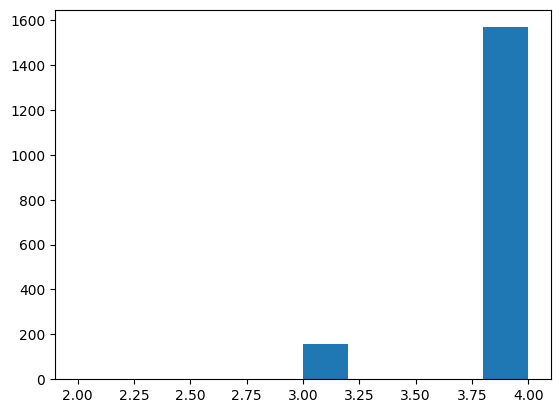

In [ ]:
#Matplotlib
plt.hist(android_games['average rating']);

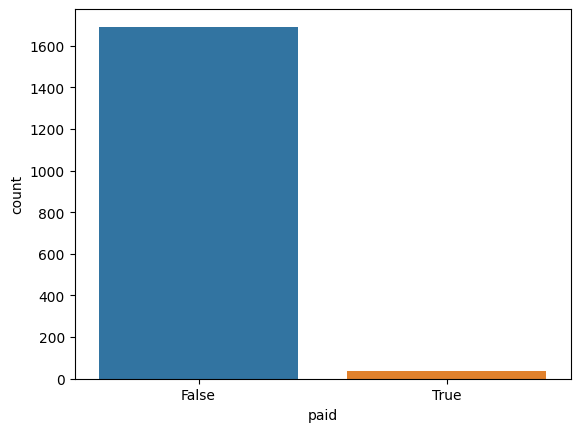

In [ ]:
#Seaborn
sns.countplot(x='paid',data=android_games);

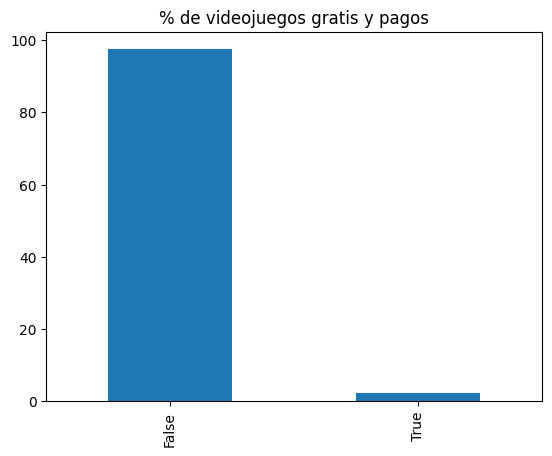

In [ ]:
plot = (100 * android_games['paid'].value_counts() / len(android_games['paid'])).plot(
kind='bar', title='% de videojuegos gratis y pagos')

In [ ]:
# Plotly
fig = go.Figure()
fig.add_trace(go.Box(y=android_games['growth (30 days)']))
fig.add_trace(go.Box(y=android_games['growth (60 days)']))

fig.show()

Variables categóricas

In [ ]:
android_games.describe(include='O')

,Date,title,installs,category,paid
count,1736,1736,1736,1736,1729
unique,121,1681,9,22,2
top,1/3/2020,Solitaire,10.0 M,GAME CARD,False
freq,21,36,806,125,1691


Verificar valores únicos de la columna category

In [ ]:
android_games['category'].unique()

array(['GAME ACTION', 'game action', 'GAME ADVENTURE', 'GAME ARCADE',
       'GAME BOARD', 'GAME CARD', 'game card', 'GAME CASINO',
       'GAME CASUAL', 'GAME EDUCATIONAL', 'GAME MUSIC', 'game music',
       'GAME PUZZLE', 'GAME RACING', 'GAME ROLE PLAYING',
       'GAME SIMULATION', 'GAME SPORTS', 'GAME STRATEGY', 'GAME TRIVIA',
       'GAME WORD', 'FICTION BOOK', 'BIOGRAPHY BOOK'], dtype=object)

Verificar valores únicos de la columna Date

In [ ]:
android_games['Date'].unique()

array(['1/1/2020', '1/2/2020', '1/3/2020', '1/4/2020', '1/5/2020',
       '1/6/2020', '1/7/2020', '1/8/2020', '1/9/2020', '1/10/2020',
       '1/11/2020', '1/12/2020', '1/13/2020', '1/14/2020', '1/15/2020',
       '1/16/2020', '1/17/2020', '1/18/2020', '1/19/2020', '1/20/2020',
       '1/21/2020', '1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020',
       '1/26/2020', '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020',
       '1/31/2020', '2/1/2020', '2/2/2020', '2/3/2020', '2/4/2020',
       '2/5/2020', '2/6/2020', '2/7/2020', '2/8/2020', '2/9/2020',
       '2/10/2020', '2/11/2020', '2/12/2020', '2/13/2020', '2/14/2020',
       '2/15/2020', '2/16/2020', '2/17/2020', '2/18/2020', '2/19/2020',
       '2/20/2020', '2/21/2020', '2/22/2020', '2/23/2020', '2/24/2020',
       '2/25/2020', '2/26/2020', '2/27/2020', '2/28/2020', '2/29/2020',
       '3/1/2020', '3/2/2020', '3/3/2020', '3/4/2020', '3/5/2020',
       '3/6/2020', '3/7/2020', '3/8/2020', '3/9/2020', '3/10/2020',
       '3/11/2020',

Verificar valores únicos de la columna installs

In [ ]:
android_games['installs'].unique()

array(['500.0 M', '100.0 M', '50.0 M', '10.0 M', '5.0 M', '1.0 M',
       '1000.0 M', '500.0 k', '100.0 k'], dtype=object)

LIMPIAR DATOS

In [ ]:
#Valores nulos por columna
missing_values_count  = android_games.isna().sum()
missing_values_count

Date                0
rank                0
title               0
total ratings       0
installs            0
average rating      8
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                7
dtype: int64

In [ ]:
total_cells = np.product(android_games.shape)
total_missing = missing_values_count.sum()

(total_missing/total_cells) * 100

0.05400345622119816

In [ ]:
android_games[android_games.isna().any(1)]

<ipython-input-65-bfd133a295ed>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.



,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
55,2/25/2020,56,PPSSPP - PSP emulator,1396630,100.0 M,4.0,0.9,1.9,0.00,GAME ACTION,1033914,134027,67488,33534,127664,NaN
113,1/14/2020,14,Growtopia,1014301,10.0 M,3.0,0.3,0.7,0.00,GAME ADVENTURE,542530,73688,72005,51658,274417,NaN
334,2/4/2020,35,Pinball Pro,282866,10.0 M,NaN,0.0,0.0,0.00,GAME BOARD,190032,46076,23927,6933,15895,False
336,2/6/2020,37,Woody Block Puzzle ®,276518,10.0 M,4.0,0.4,0.8,0.00,GAME BOARD,195563,43630,12654,6916,17752,NaN
477,2/29/2020,60,Reigns,146718,500.0 k,4.0,0.1,0.1,2.99,GAME CARD,108356,25417,5887,2868,4187,NaN
809,3/24/2020,84,Halloween Makeup Me,56154,5.0 M,NaN,0.1,0.1,0.00,GAME EDUCATIONAL,37592,6117,3688,1999,6756,False
869,2/13/2020,44,Cytus II,111679,1.0 M,NaN,0.8,1.7,1.99,GAME MUSIC,88842,11945,4620,1947,4322,True
1584,2/28/2020,59,96%: Family Quiz,77391,1.0 M,NaN,0.0,0.0,0.00,GAME TRIVIA,46468,15506,6715,2504,6196,False
1585,2/29/2020,60,"Эврика! Логические Задачи, Игры и Головоломки",76857,1.0 M,4.0,0.1,0.1,0.00,GAME TRIVIA,55447,12867,2797,1049,4695,NaN
1591,3/6/2020,66,Quiz World: Play and Win Everyday!,67251,1.0 M,4.0,78.6,157.2,0.00,GAME TRIVIA,52444,3270,2133,1286,8115,NaN


In [ ]:
# Reemplazar los valores Nan de average rating por 4
values = {"average rating": 4}
android_games.fillna(value=values, inplace=True)

In [ ]:
# Validar los valores de columna paid con los valores en columna price
for i in range(len(android_games['price'])):
  if android_games['price'][i] != 0:
    android_games['paid'][i]=True
  else:
    android_games['paid'][i]=False

<ipython-input-67-55ca649a8611>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-55ca649a8611>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
android_games[android_games['price']>0]

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
209,1/10/2020,10,Minecraft,4100452,10.0 M,4.0,234.3,2.4,7.49,GAME ARCADE,3324435,317144,135048,65677,258146,True
260,3/1/2020,61,Geometry Dash,777941,1.0 M,4.0,0.7,1.3,1.99,GAME ARCADE,636912,73308,24749,9026,33945,True
477,2/29/2020,60,Reigns,146718,500.0 k,4.0,0.1,0.1,2.99,GAME CARD,108356,25417,5887,2868,4187,True
869,2/13/2020,44,Cytus II,111679,1.0 M,4.0,0.8,1.7,1.99,GAME MUSIC,88842,11945,4620,1947,4322,True
923,4/7/2020,98,Muse Dash,34140,100.0 k,4.0,768.5,6.7,1.49,game music,29210,2774,718,429,1007,True
1217,4/1/2020,92,Evertale,311126,1.0 M,4.0,725.3,5.1,0.99,GAME ROLE PLAYING,222761,32884,15877,9298,30304,True
1588,3/3/2020,63,Trivia Crack (No Ads),75712,500.0 k,4.0,0.7,1.4,1.99,GAME TRIVIA,56454,12628,3284,1088,2256,True


In [ ]:
# Verificar si hay valores nulos
android_games.isna().sum()

Date                0
rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

In [ ]:
# Verificar si hay duplicados
android_games[android_games.duplicated()]

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid


In [ ]:
android_games[android_games.duplicated(subset=['Date',	'rank',	'title',	'total ratings', 'category'], keep = False)]

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
402,1/3/2020,3,Solitaire,1590733,100.0 M,4.0,0.4,0.9,0.0,GAME CARD,1117298,308402,82191,25750,57090,False
403,1/3/2020,3,Solitaire,1590733,100.0 M,4.0,0.4,0.9,0.0,GAME CARD,431463,90350,40065,15998,70189,False
404,1/3/2020,3,Solitaire,1590733,100.0 M,4.0,0.4,0.9,0.0,GAME CARD,418115,47121,16871,6574,18567,False
405,1/3/2020,3,Solitaire,1590733,100.0 M,4.0,0.4,0.9,0.0,GAME CARD,299715,68177,20617,4959,12653,False
412,1/10/2020,10,Solitaire,648068,50.0 M,4.0,0.0,0.0,0.0,GAME CARD,1117298,308402,82191,25750,57090,False
413,1/10/2020,10,Solitaire,648068,50.0 M,4.0,0.0,0.0,0.0,GAME CARD,431463,90350,40065,15998,70189,False
414,1/10/2020,10,Solitaire,648068,50.0 M,4.0,0.0,0.0,0.0,GAME CARD,418115,47121,16871,6574,18567,False
415,1/10/2020,10,Solitaire,648068,50.0 M,4.0,0.0,0.0,0.0,GAME CARD,299715,68177,20617,4959,12653,False
418,1/13/2020,13,Solitaire,507250,50.0 M,4.0,0.9,1.9,0.0,GAME CARD,1117298,308402,82191,25750,57090,False
419,1/13/2020,13,Solitaire,507250,50.0 M,4.0,0.9,1.9,0.0,GAME CARD,431463,90350,40065,15998,70189,False


In [ ]:
top_games = android_games.groupby(['Date','rank','title','total ratings','installs','average rating',
                                   'growth (30 days)','growth (60 days)','price','category','paid'])['5 star ratings','4 star ratings',
                                   '3 star ratings','2 star ratings','1 star ratings'].mean()
top_games.reset_index(inplace=True)

<ipython-input-72-6f06555fd91d>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
top_games[top_games.duplicated(subset=['Date',	'rank',	'title',	'total ratings', 'category'], keep = False)]

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,paid,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings


In [ ]:
top_games.sample(5)

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,paid,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
1207,3/19/2020,79,Idle Miner Tycoon: Mine & Money Clicker Manage...,424389,50.0 M,4.0,0.2,0.5,0.0,GAME SIMULATION,False,322660.0,60867.0,23726.0,5834.0,11299.0
680,2/17/2020,48,Rodeo Stampede: Sky Zoo Safari,880964,10.0 M,4.0,0.4,0.8,0.0,GAME CASUAL,False,566493.0,120253.0,69961.0,33039.0,91215.0
978,2/7/2020,38,Escape game : 50 rooms 1,754345,10.0 M,4.0,1.3,2.7,0.0,GAME PUZZLE,False,516134.0,122842.0,56446.0,18848.0,40072.0
1611,4/5/2020,96,Happy Pet Story: Virtual Pet Game,371385,10.0 M,4.0,0.8,1.6,0.0,GAME SIMULATION,False,293088.0,33781.0,16211.0,7196.0,21108.0
932,2/4/2020,35,My Town: Play & Discover - City Builder Game,116243,10.0 M,4.0,2013.3,9.3,0.0,GAME EDUCATIONAL,False,80372.0,8500.0,5402.0,4349.0,17617.0


Uniformidad

In [ ]:
top_games['category'] = top_games['category'].str.upper()

In [ ]:
top_games['category'].unique()

array(['GAME SPORTS', 'BIOGRAPHY BOOK', 'GAME CASUAL', 'GAME STRATEGY',
       'GAME PUZZLE', 'GAME ACTION', 'GAME RACING', 'GAME BOARD',
       'GAME ADVENTURE', 'GAME ROLE PLAYING', 'GAME ARCADE',
       'FICTION BOOK', 'GAME SIMULATION', 'GAME MUSIC',
       'GAME EDUCATIONAL', 'GAME TRIVIA', 'GAME CARD', 'GAME CASINO',
       'GAME WORD'], dtype=object)

In [ ]:
top_games = top_games[~top_games['category'].isin(['FICTION BOOK', 'BIOGRAPHY BOOK'])]

In [ ]:
top_games['category'].unique()

array(['GAME SPORTS', 'GAME CASUAL', 'GAME STRATEGY', 'GAME PUZZLE',
       'GAME ACTION', 'GAME RACING', 'GAME BOARD', 'GAME ADVENTURE',
       'GAME ROLE PLAYING', 'GAME ARCADE', 'GAME SIMULATION',
       'GAME MUSIC', 'GAME EDUCATIONAL', 'GAME TRIVIA', 'GAME CARD',
       'GAME CASINO', 'GAME WORD'], dtype=object)

Lispieza en los tipos de datos

In [ ]:
def installs(x):
    if x[-1] == 'M':
        return(float(x[:-2])*1000000)
    else:
        return(float(x[:-2])*1000)

In [ ]:
top_games['installs'] = top_games['installs'].apply(installs)

<ipython-input-80-3d54705277fc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
display(top_games['installs'].unique())
display(top_games['installs'].dtype)

array([5.e+08, 1.e+09, 1.e+08, 5.e+07, 1.e+07, 5.e+06, 1.e+06, 5.e+05,
       1.e+05])

dtype('float64')

In [ ]:
top_games['installs'].astype('int')

0        500000000
2       1000000000
3        500000000
4        100000000
5        500000000
           ...    
1701       5000000
1702       5000000
1703       1000000
1704      10000000
1705       1000000
Name: installs, Length: 1700, dtype: int64

Reemplazar valores

In [ ]:
top_games['paid'].unique()

array([False,  True])

In [ ]:
top_games['paid'] = top_games['paid'].replace({True:1, False:0})

<ipython-input-84-cf06134499be>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
top_games['paid'].unique()

array([0, 1])

Unificar formato

In [ ]:
top_games['Date'] = pd.to_datetime(top_games['Date']).dt.strftime('%m/%d/%Y')

In [ ]:
display(top_games['Date'].unique())

array(['01/01/2020', '01/10/2020', '01/11/2020', '01/12/2020',
       '01/13/2020', '01/14/2020', '01/15/2020', '01/16/2020',
       '01/17/2020', '01/18/2020', '01/19/2020', '01/02/2020',
       '01/20/2020', '01/21/2020', '01/22/2020', '01/23/2020',
       '01/24/2020', '01/25/2020', '01/26/2020', '01/27/2020',
       '01/28/2020', '01/29/2020', '01/03/2020', '01/30/2020',
       '01/31/2020', '01/04/2020', '01/05/2020', '01/06/2020',
       '01/07/2020', '01/08/2020', '01/09/2020', '02/01/2020',
       '02/10/2020', '02/11/2020', '02/12/2020', '02/13/2020',
       '02/14/2020', '02/15/2020', '02/16/2020', '02/17/2020',
       '02/18/2020', '02/19/2020', '02/02/2020', '02/20/2020',
       '02/21/2020', '02/22/2020', '02/23/2020', '02/24/2020',
       '02/25/2020', '02/26/2020', '02/27/2020', '02/28/2020',
       '02/29/2020', '02/03/2020', '02/04/2020', '02/05/2020',
       '02/06/2020', '02/07/2020', '02/08/2020', '02/09/2020',
       '03/01/2020', '03/10/2020', '03/11/2020', '03/12

In [ ]:
top_games.to_csv("android_games_limpieza_datos.csv")